In [3]:
from scipy.optimize import least_squares
import numpy as np
import matplotlib.pyplot as plt
import ares
from average_dTb import average_dTb

In [13]:
def dTb(m_chi, z):
    z_array, dTb_averaged, m_chi = average_dTb(m_chi=m_chi, more_random_v_stream=1)
    dTb = np.interp(z, z_array, dTb_averaged)
    return dTb

In [14]:
z_sample = np.arange(10, 300, 10)

theta_true = 0.5
dTb_accurate = dTb(theta_true, z_sample)

noise = 3
dTb_sample = dTb_accurate + noise * np.random.normal(size = z_sample.shape[0])

dark_matter_mass = 0.5 GeV
initial_v_stream = 24295.102787073214 m/s
It costs 13.90 seconds to calculate dTb of 1 different initial_v_streams.
Preprocessing 67 files of dTb for m_chi = 0.5 GeV...
67 files have been interpolated.


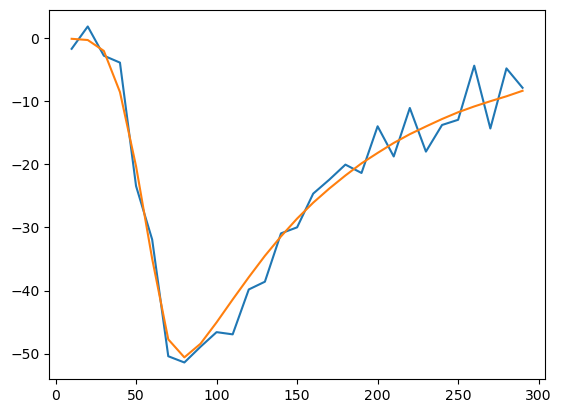

In [15]:
plt.plot(z_sample, dTb_sample)
plt.plot(z_sample, dTb_accurate)

In [ ]:
def fun(theta):
    residual = dTb(theta, z_sample) - dTb_sample
    return residual

In [60]:
theta_initial = [3, 5, 0]
res = least_squares(fun, theta_initial)

In [61]:
res.success

True

In [62]:
res.x

array([ 0.96675162, 10.21344119,  0.49353684])

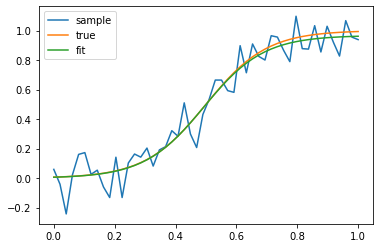

In [63]:
plt.plot(z_sample, dTb_sample, label='sample')
plt.plot(z_sample, dTb(theta_true, z_sample), label = 'true')
plt.plot(z_sample, dTb(res.x, z_sample), label = 'fit')
plt.legend()